In [2]:
# 9:33pm

import os

import numpy as np
import pandas as pd

from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

#event_prefix = ['event000001000', 'event000001002']
event_prefix = 'event000001001'
hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))


####hits_playground

hits_playground = hits[["x","y","z"]]
hits_playground["r"] =np.sqrt(hits_playground["x"]**2 + hits_playground["y"]**2 + hits_playground["z"]**2)
hits_playground["phi"] = np.arctan2(hits_playground["x"], hits_playground["y"])
hits_playground["theta"] = np.arccos(hits_playground["z"]/hits_playground["r"])


# real_particles 
real_particles = particles[particles["particle_id"] != 0]
particles_count = real_particles.shape[0]






hits_playground["r"].ix[particles_count]

/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

818.4526

In [3]:
hit_counts_list = []
particles_count_list = []
r_list = []


for i in range(40):

    #event_prefix = ['event000001000', 'event000001002']
    event_prefix = 'event000001' + "%03d" % (i)
    hits, cells, particles, truth = load_event(os.path.join('train_100_events/', event_prefix))


    ####hits_playground

    hits_playground = hits[["x","y","z"]]
    hits_playground["r"] =np.sqrt(hits_playground["x"]**2 + hits_playground["y"]**2 + hits_playground["z"]**2)
    hits_playground["phi"] = np.arctan2(hits_playground["x"], hits_playground["y"])
    hits_playground["theta"] = np.arccos(hits_playground["z"]/hits_playground["r"])


    # real_particles 
    real_particles = particles[particles["particle_id"] != 0]
    particles_count = real_particles.shape[0]
    hit_counts = hits_playground.shape[0]
    
    # list append
    hit_counts_list.append(hit_counts)
    particles_count_list.append(particles_count)
    r_list.append(hits_playground["r"].ix[particles_count])
    print(hits_playground["r"].ix[particles_count])
    print(particles_count)
    print(hit_counts)

/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yao-yulin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

698.1839
12263
120939
818.4526
8915
93680
703.82477
12763
125504
719.5956
10261
104451
698.57916
14159
138568
707.9207
10945
110023
702.7128
11773
118534
703.8678
10941
111321
704.28284
11128
111867
703.5984
10724
108769
700.3571
10150
104084
701.59076
11630
117559
699.45886
10874
110542
704.41956
10343
106584
699.388
12663
126166
703.6077
12322
122359
700.3403
11770
117847
699.3995
12407
124251
701.2232
8796
92521
706.3952
12355
122849
705.885
9041
94081
703.8238
10287
104331
703.1135
10141
104514
708.8937
12975
128037
703.6745
11602
117272
699.64355
11961
119916
710.6973
12316
122690
703.3358
11619
116111
715.9025
11515
116426
703.12024
10701
109169
721.72174
11182
113998
702.65704
12290
122263
712.6446
9766
101355
706.4807
9185
96013
714.0497
11515
114724
713.88293
9316
96644
705.8058
10246
105489
699.60315
11539
115620
714.8885
11393
113875
716.90955
8343
88221


Text(0,0.5,'particles_count')

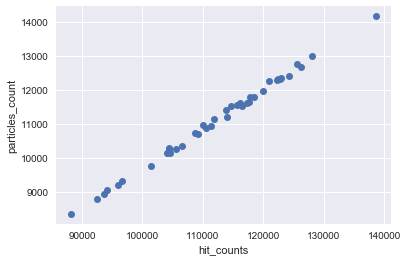

In [4]:
plt.plot(hit_counts_list, particles_count_list, "o")
plt.xlabel("hit_counts")
plt.ylabel("particles_count")

In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.array([hit_counts_list]).T, np.array(particles_count_list))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(100, 1)


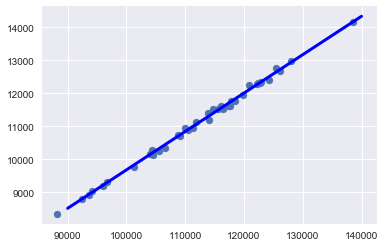

In [6]:
diabetes_X_test = np.array([np.linspace(90000, 140000, 100)]).T
print(diabetes_X_test.shape)
diabetes_y_pred = regr.predict(diabetes_X_test)

plt.scatter(hit_counts_list, particles_count_list)
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)




In [7]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.1165261]


In [8]:
print('Coefficients: \n', regr.intercept_)

Coefficients: 
 -1974.7525724298102


In [9]:
hit_counts * regr.coef_ + regr.intercept_

array([8305.29610535])

In [10]:
particles_count

8343